# 🛒 Retail Demand Forecasting System
This project performs end-to-end retail demand forecasting including data cleaning, preprocessing, EDA, model training, and evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SuperMarket Analysis.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


# Data Exploration

In [3]:
df.shape

(1000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [6]:
df.select_dtypes(include='object').columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment'],
      dtype='object')

In [7]:
df.select_dtypes(include='number').columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

# Data Cleaning

In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time']).dt.time

In [10]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()

In [11]:
df['day_of_week'] = df['Date'].dt.dayofweek
df['weekday_name'] = df['Date'].dt.day_name()

In [12]:
df['is_weekend'] = df['day_of_week'].isin([5,6])

In [13]:
df['Prev_day_sales'] = df['Sales'].shift(1)
df['week_ago_sales'] = df['Sales'].shift(7)

In [14]:
df['rolling_7'] = df['Sales'].rolling(window=7).mean()

In [15]:
df['is_promo'] = df['Date'].between('2019-01-01', '2019-01-10')

In [16]:
df.drop(['Invoice ID', 'Time'], axis=1, inplace=True)

In [17]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,...,Day,Month,Weekday,day_of_week,weekday_name,is_weekend,Prev_day_sales,week_ago_sales,rolling_7,is_promo
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,...,5,1,Saturday,5,Saturday,True,NaN,NaN,NaN,True
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,...,8,3,Friday,4,Friday,False,548.9715,NaN,NaN,False
2,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,...,3,3,Sunday,6,Sunday,True,80.2200,NaN,NaN,False
3,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,...,27,1,Sunday,6,Sunday,True,340.5255,NaN,NaN,False
4,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,...,8,2,Friday,4,Friday,False,489.0480,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,...,29,1,Tuesday,1,Tuesday,False,63.9975,864.570,306.603,False
996,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,...,2,3,Saturday,5,Saturday,True,42.3675,633.108,362.229,False
997,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,...,9,2,Saturday,5,Saturday,True,1022.4900,296.940,324.585,False
998,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,...,22,2,Friday,4,Friday,False,33.4320,804.300,219.558,False


In [18]:
df[df['Rating']>5.0].shape

(826, 25)

In [19]:
df['Rating'] = df['Rating'].apply(lambda x:5.0 if x>5.0 else x)

# EDA

In [20]:
numerical = df.select_dtypes(exclude='object').columns
numerical

Index(['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Day', 'Month',
       'day_of_week', 'is_weekend', 'Prev_day_sales', 'week_ago_sales',
       'rolling_7', 'is_promo'],
      dtype='object')

In [21]:
categorical = df.select_dtypes(include='object').columns
categorical

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment',
       'Weekday', 'weekday_name'],
      dtype='object')

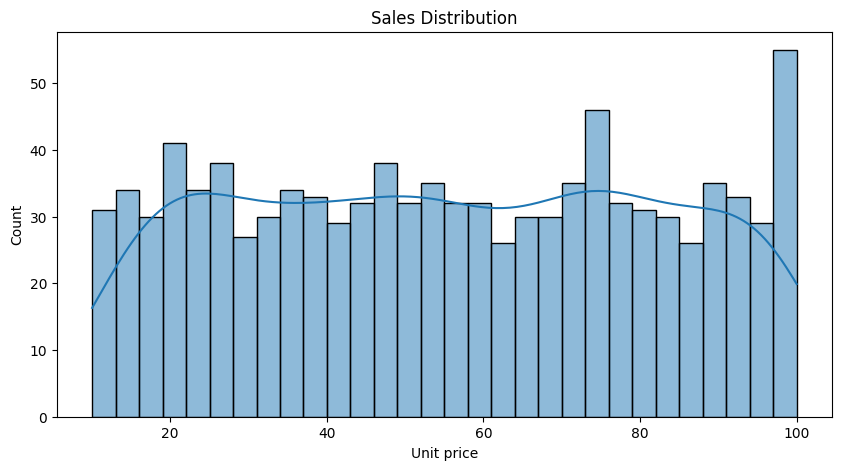

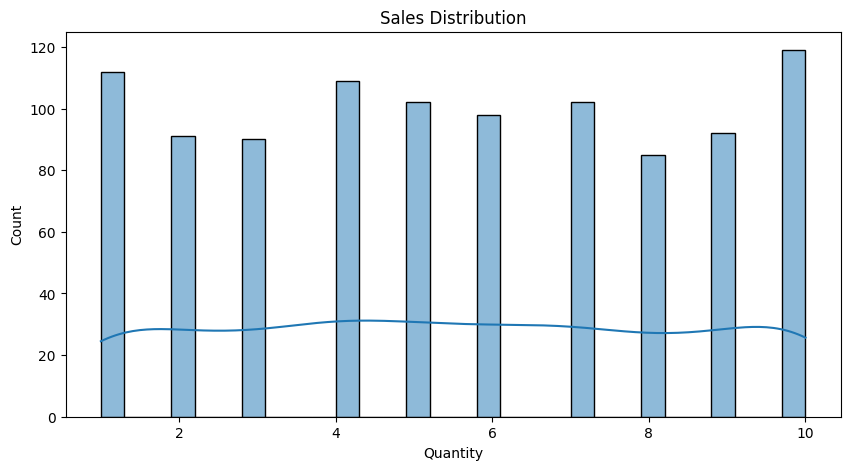

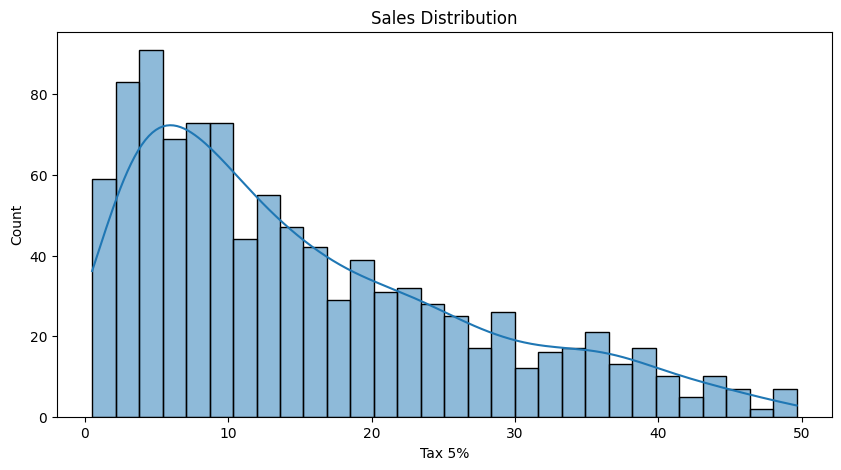

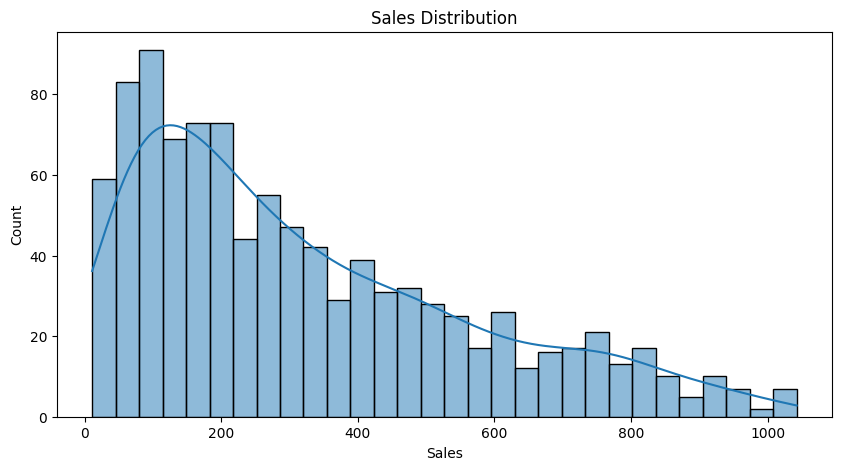

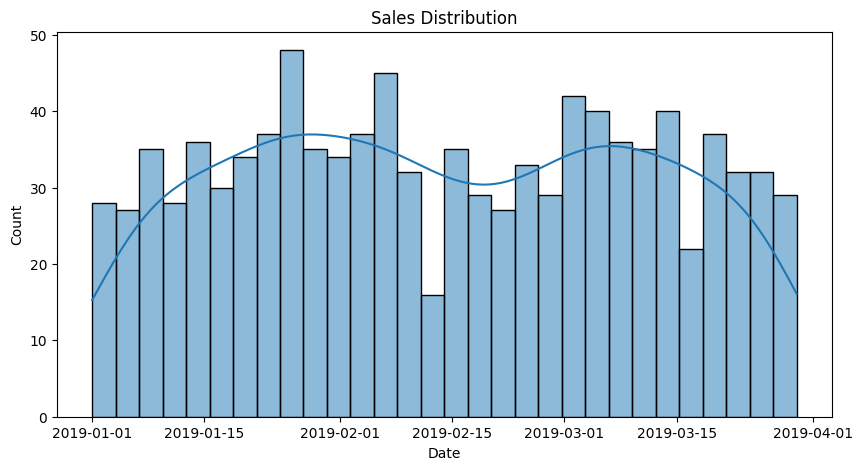

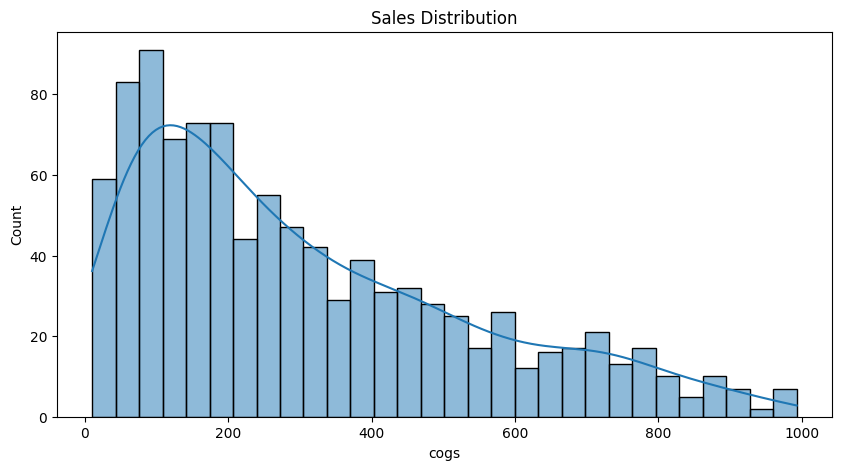

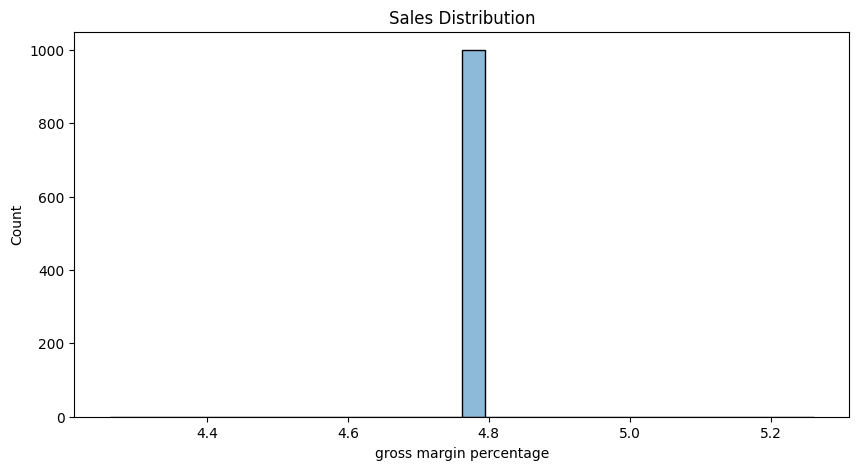

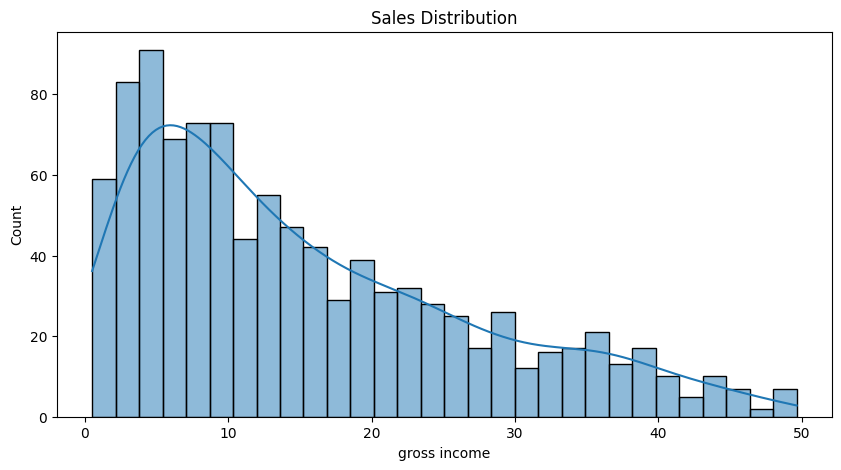

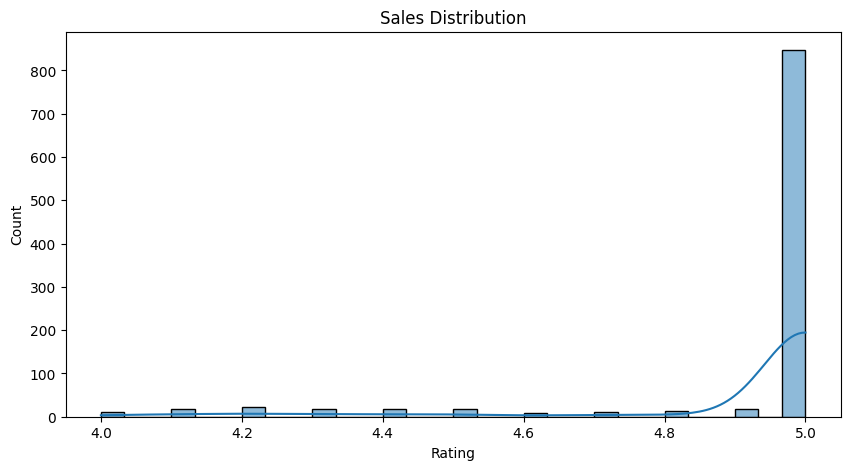

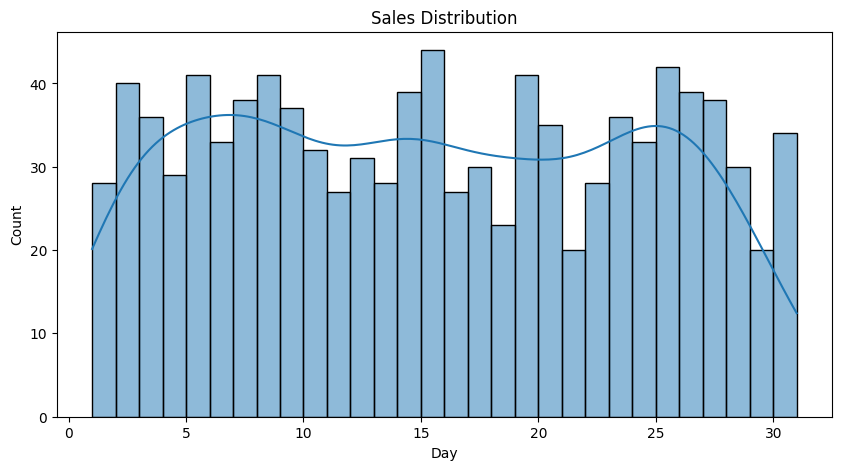

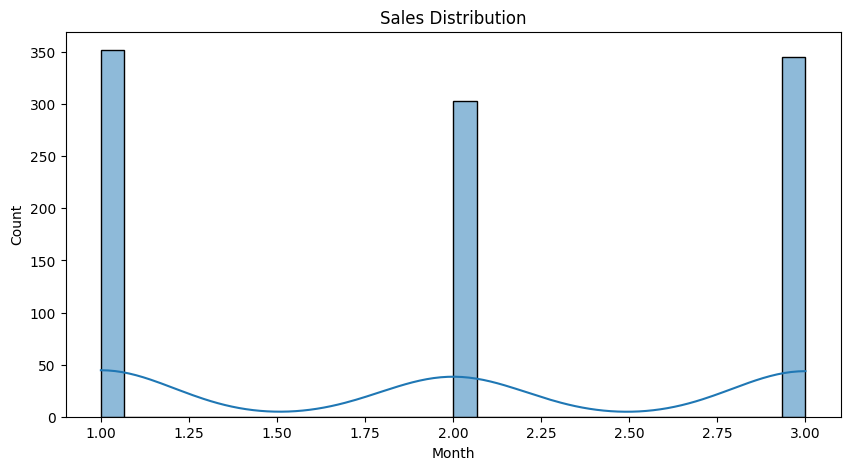

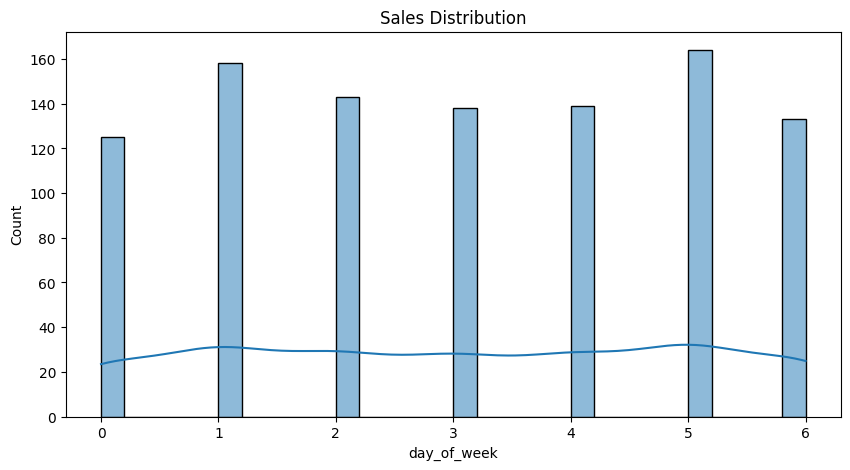

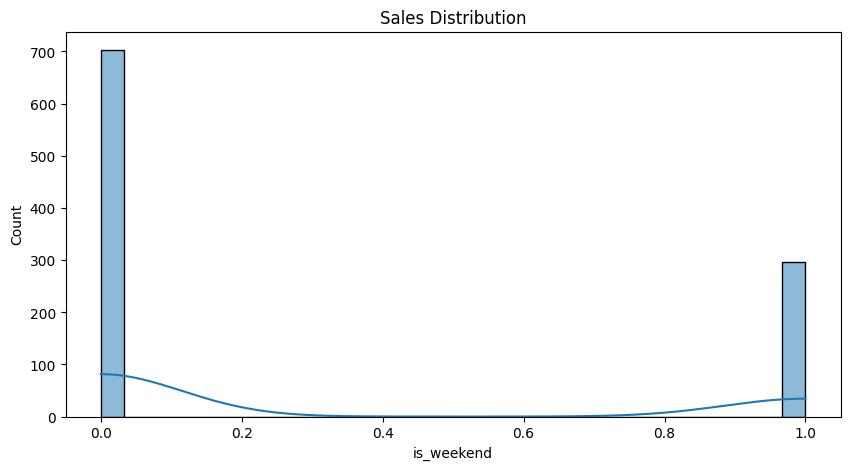

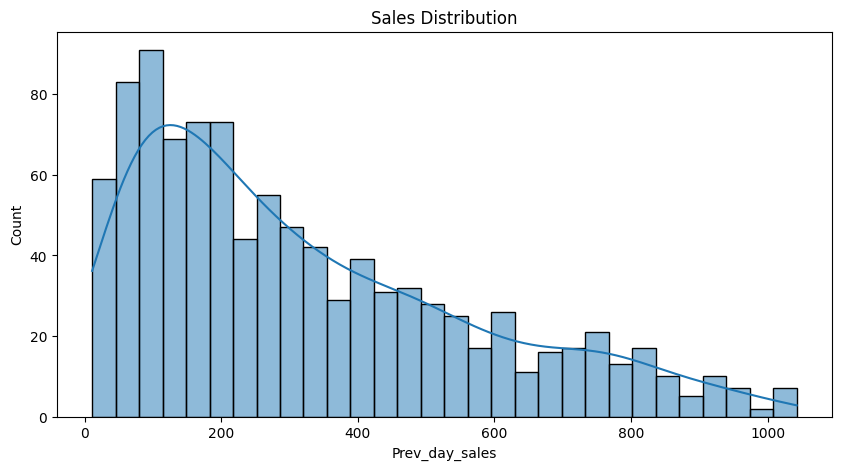

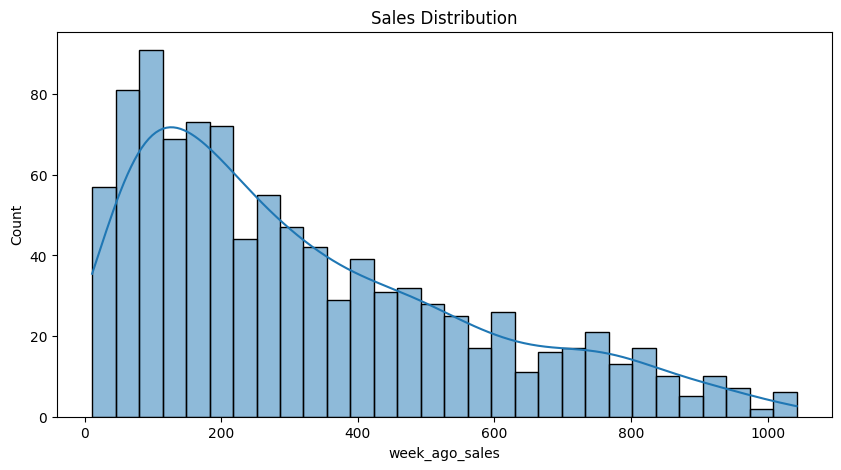

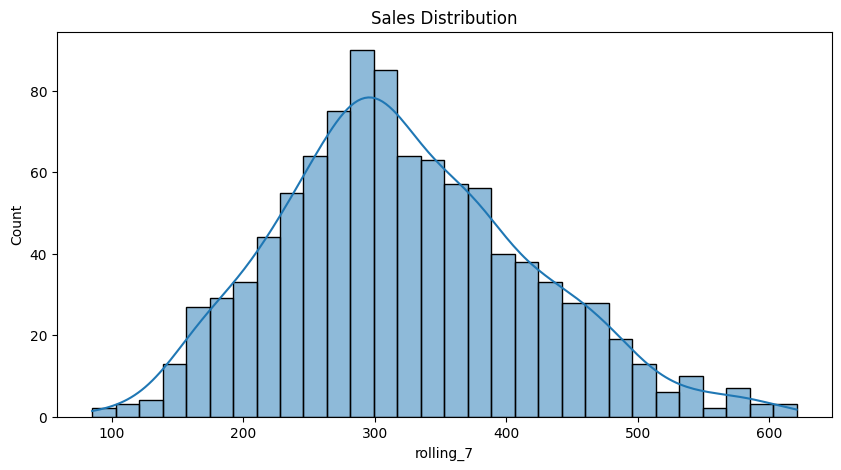

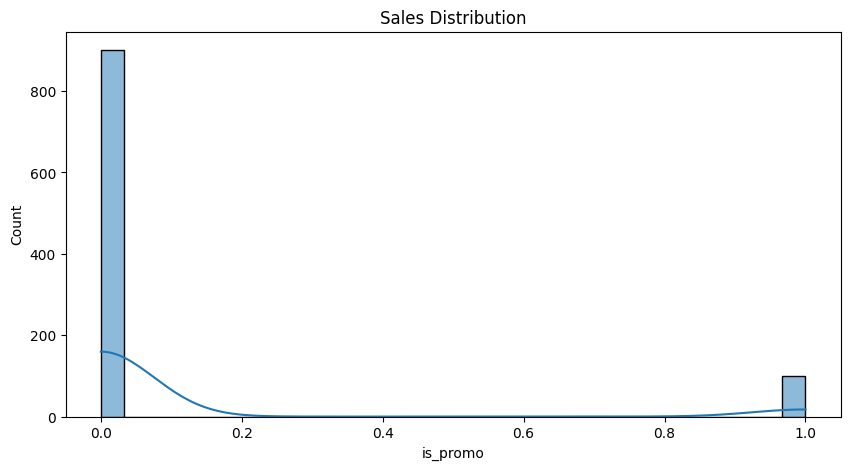

In [22]:
for column in numerical:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title('Sales Distribution')
    plt.show()

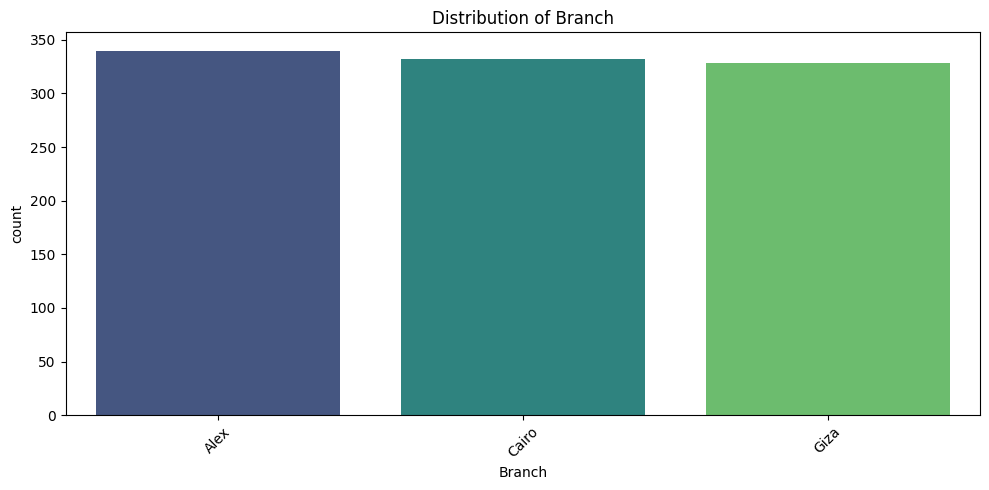

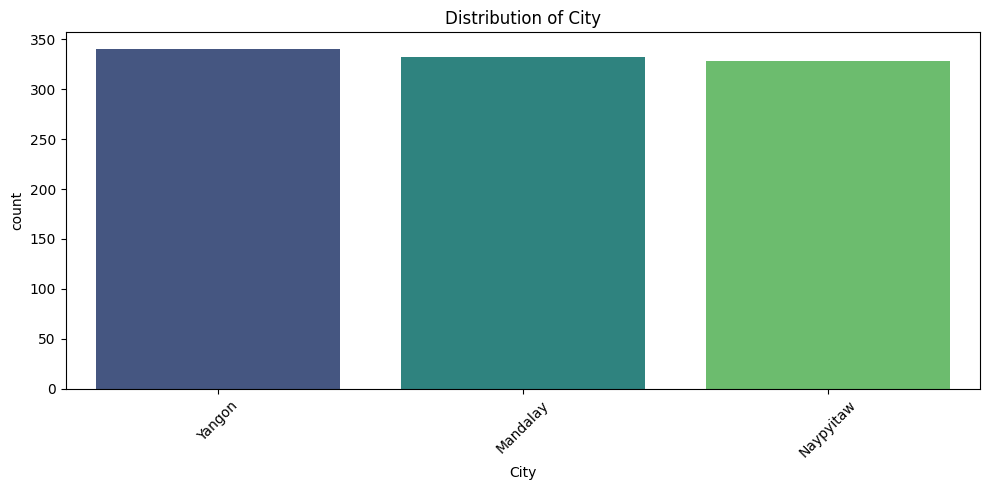

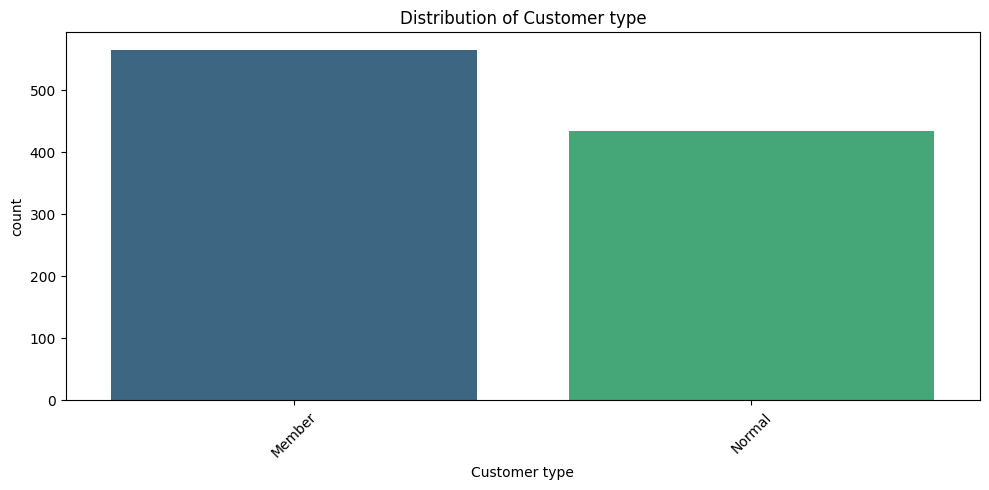

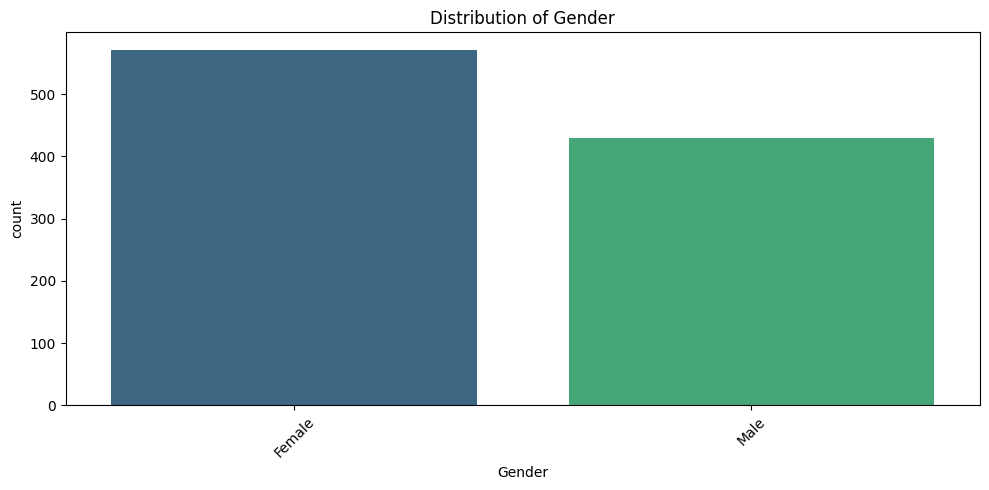

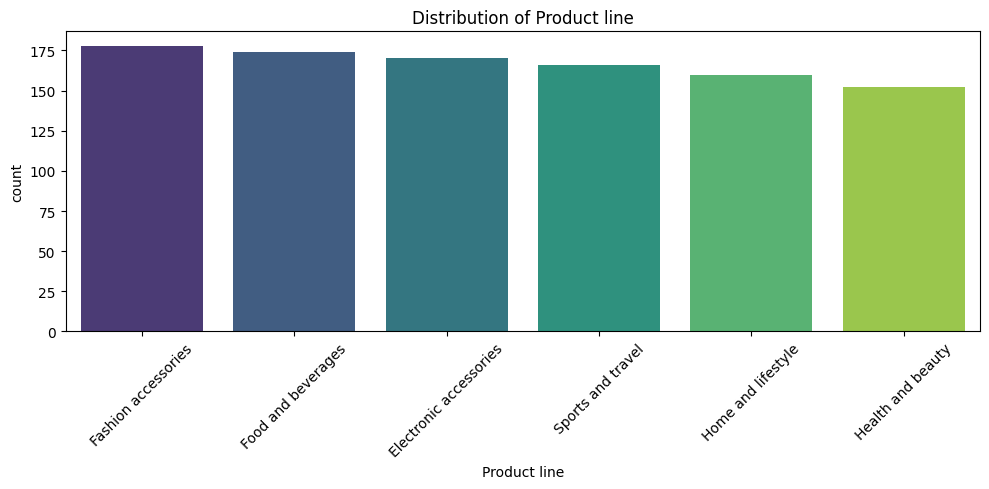

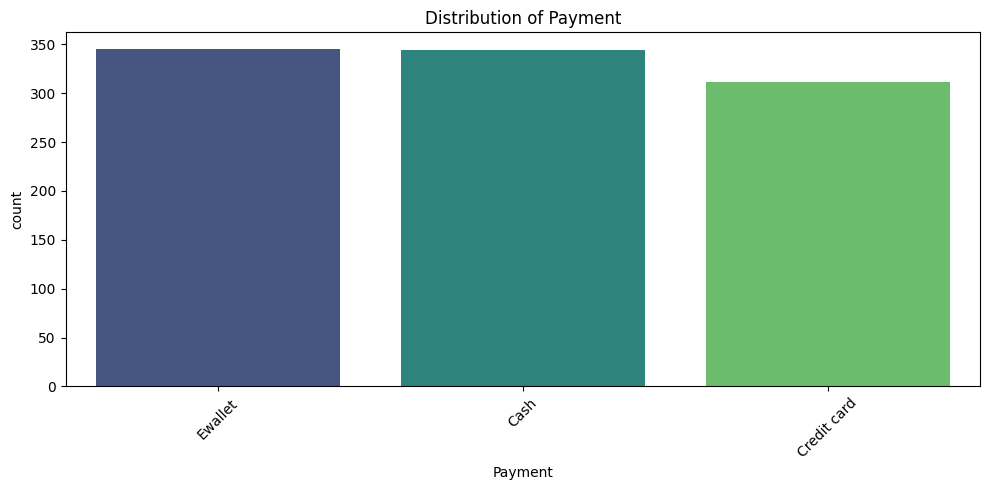

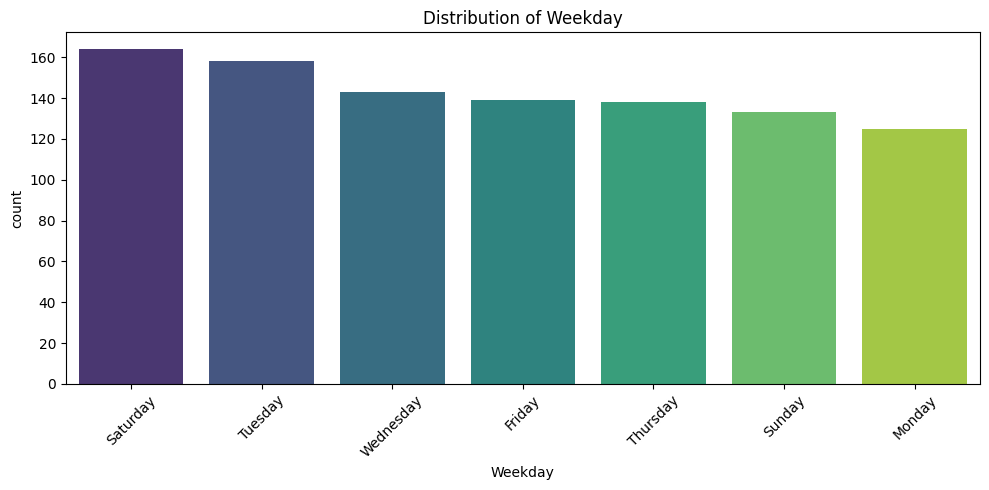

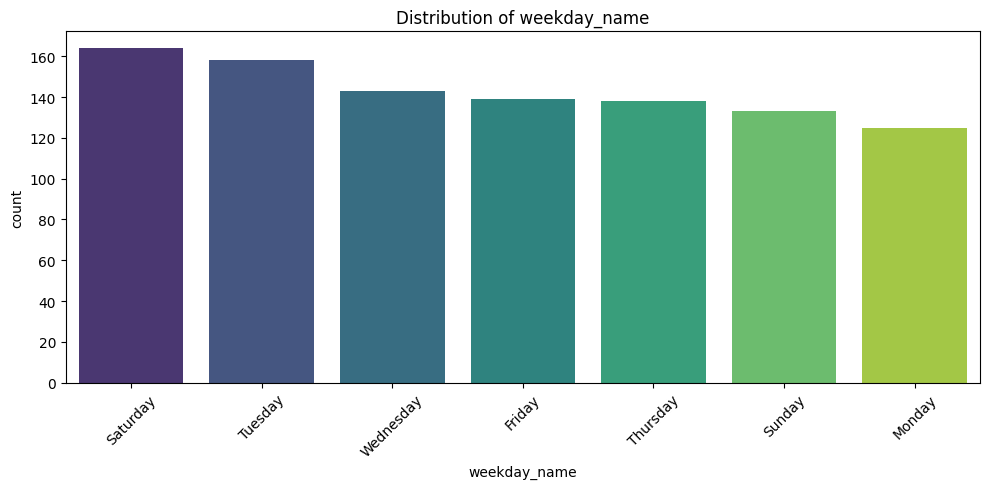

In [23]:
for column in categorical:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [24]:
print(df.columns)

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Day', 'Month',
       'Weekday', 'day_of_week', 'weekday_name', 'is_weekend',
       'Prev_day_sales', 'week_ago_sales', 'rolling_7', 'is_promo'],
      dtype='object')


In [25]:
df.set_index('Date', inplace=True)

daily_sales = df['Sales'].resample('D').sum()

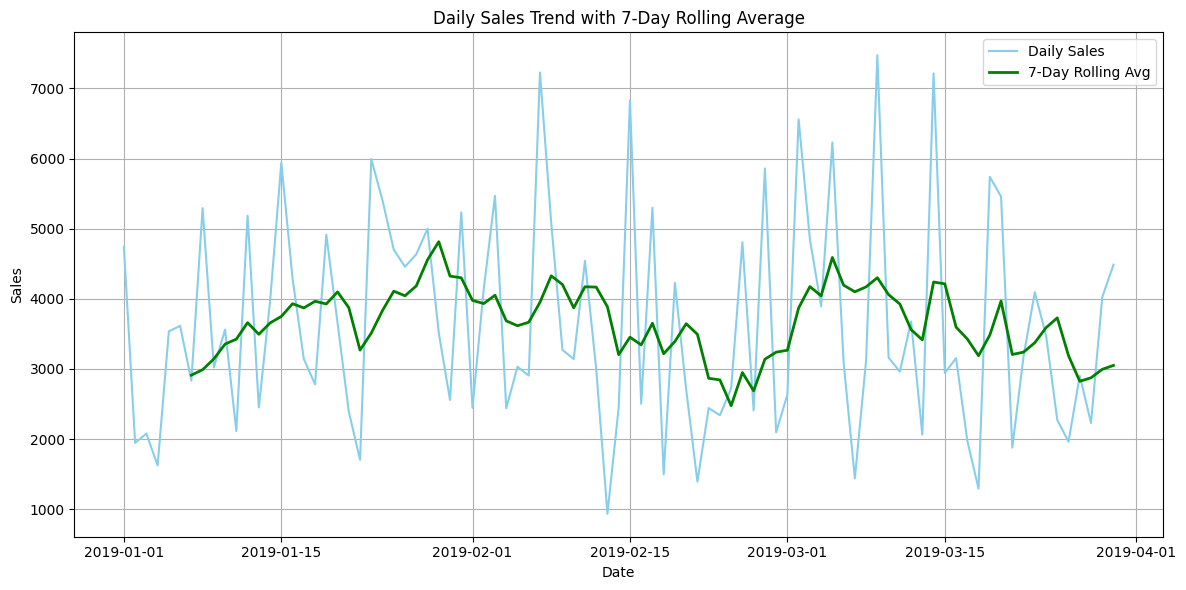

In [26]:
rolling_7 = daily_sales.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales', color='skyblue')
plt.plot(rolling_7, label='7-Day Rolling Avg', color='green', linewidth=2)
plt.title('Daily Sales Trend with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import zscore

# Group sales by Date
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()

# Calculate Z-scores for the Sales column
daily_sales['Z_score'] = zscore(daily_sales['Sales'])

# Define a threshold for spikes (e.g., Z > 2 means sales significantly higher than average)
threshold = 2
spikes = daily_sales[daily_sales['Z_score'] > threshold]

# Display the spike dates and values
print("Detected Sales Spikes:")
spikes[['Date', 'Sales', 'Z_score']]

Detected Sales Spikes:


,Date,Sales,Z_score
37,2019-02-07,7228.2105,2.369514
45,2019-02-15,6830.7855,2.107884
67,2019-03-09,7474.0470,2.531352
72,2019-03-14,7214.6340,2.360577


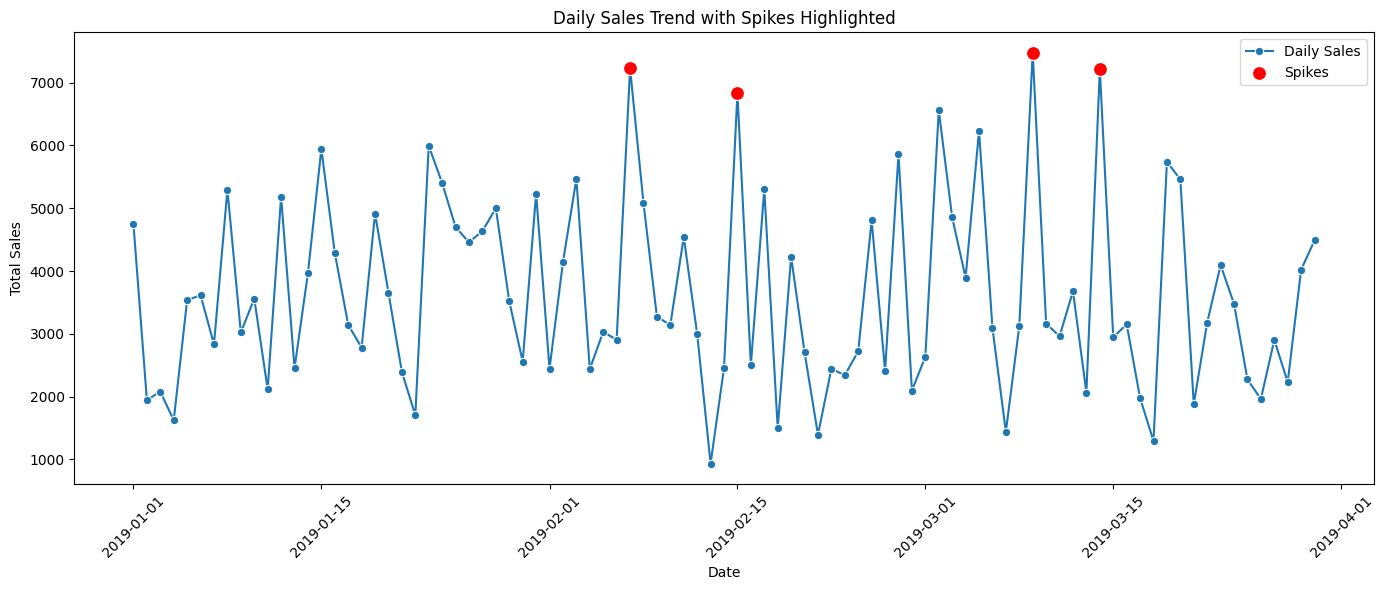

In [28]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='Date', y='Sales', marker='o', label='Daily Sales')
sns.scatterplot(data=spikes, x='Date', y='Sales', color='red', s=100, label='Spikes', zorder=5)
plt.title('Daily Sales Trend with Spikes Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
df.corr(numeric_only=True)

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating,Day,Month,day_of_week,is_weekend,Prev_day_sales,week_ago_sales,rolling_7,is_promo
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.018044,0.057021,-0.027387,-0.007040,0.004133,0.006465,0.017030,0.222396,-0.017892
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.006555,-0.043347,-0.014524,0.054770,0.045336,0.050368,-0.007761,0.291463,0.023502
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.045271,-0.002515,-0.022301,0.038809,0.041475,0.030776,0.012533,0.383215,0.003814
Sales,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.045271,-0.002515,-0.022301,0.038809,0.041475,0.030776,0.012533,0.383215,0.003814
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.045271,-0.002515,-0.022301,0.038809,0.041475,0.030776,0.012533,0.383215,0.003814
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.045271,-0.002515,-0.022301,0.038809,0.041475,0.030776,0.012533,0.383215,0.003814
Rating,-0.018044,-0.006555,-0.045271,-0.045271,-0.045271,NaN,-0.045271,1.000000,-0.001780,-0.027437,-0.047797,-0.068409,-0.021863,0.057827,-0.045003,0.010895
Day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,NaN,-0.002515,-0.001780,1.000000,-0.118996,-0.066697,-0.088160,0.020523,0.060801,-0.025186,-0.366587
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.027437,-0.118996,1.000000,0.035357,0.029043,-0.000085,-0.034214,0.026058,-0.394279


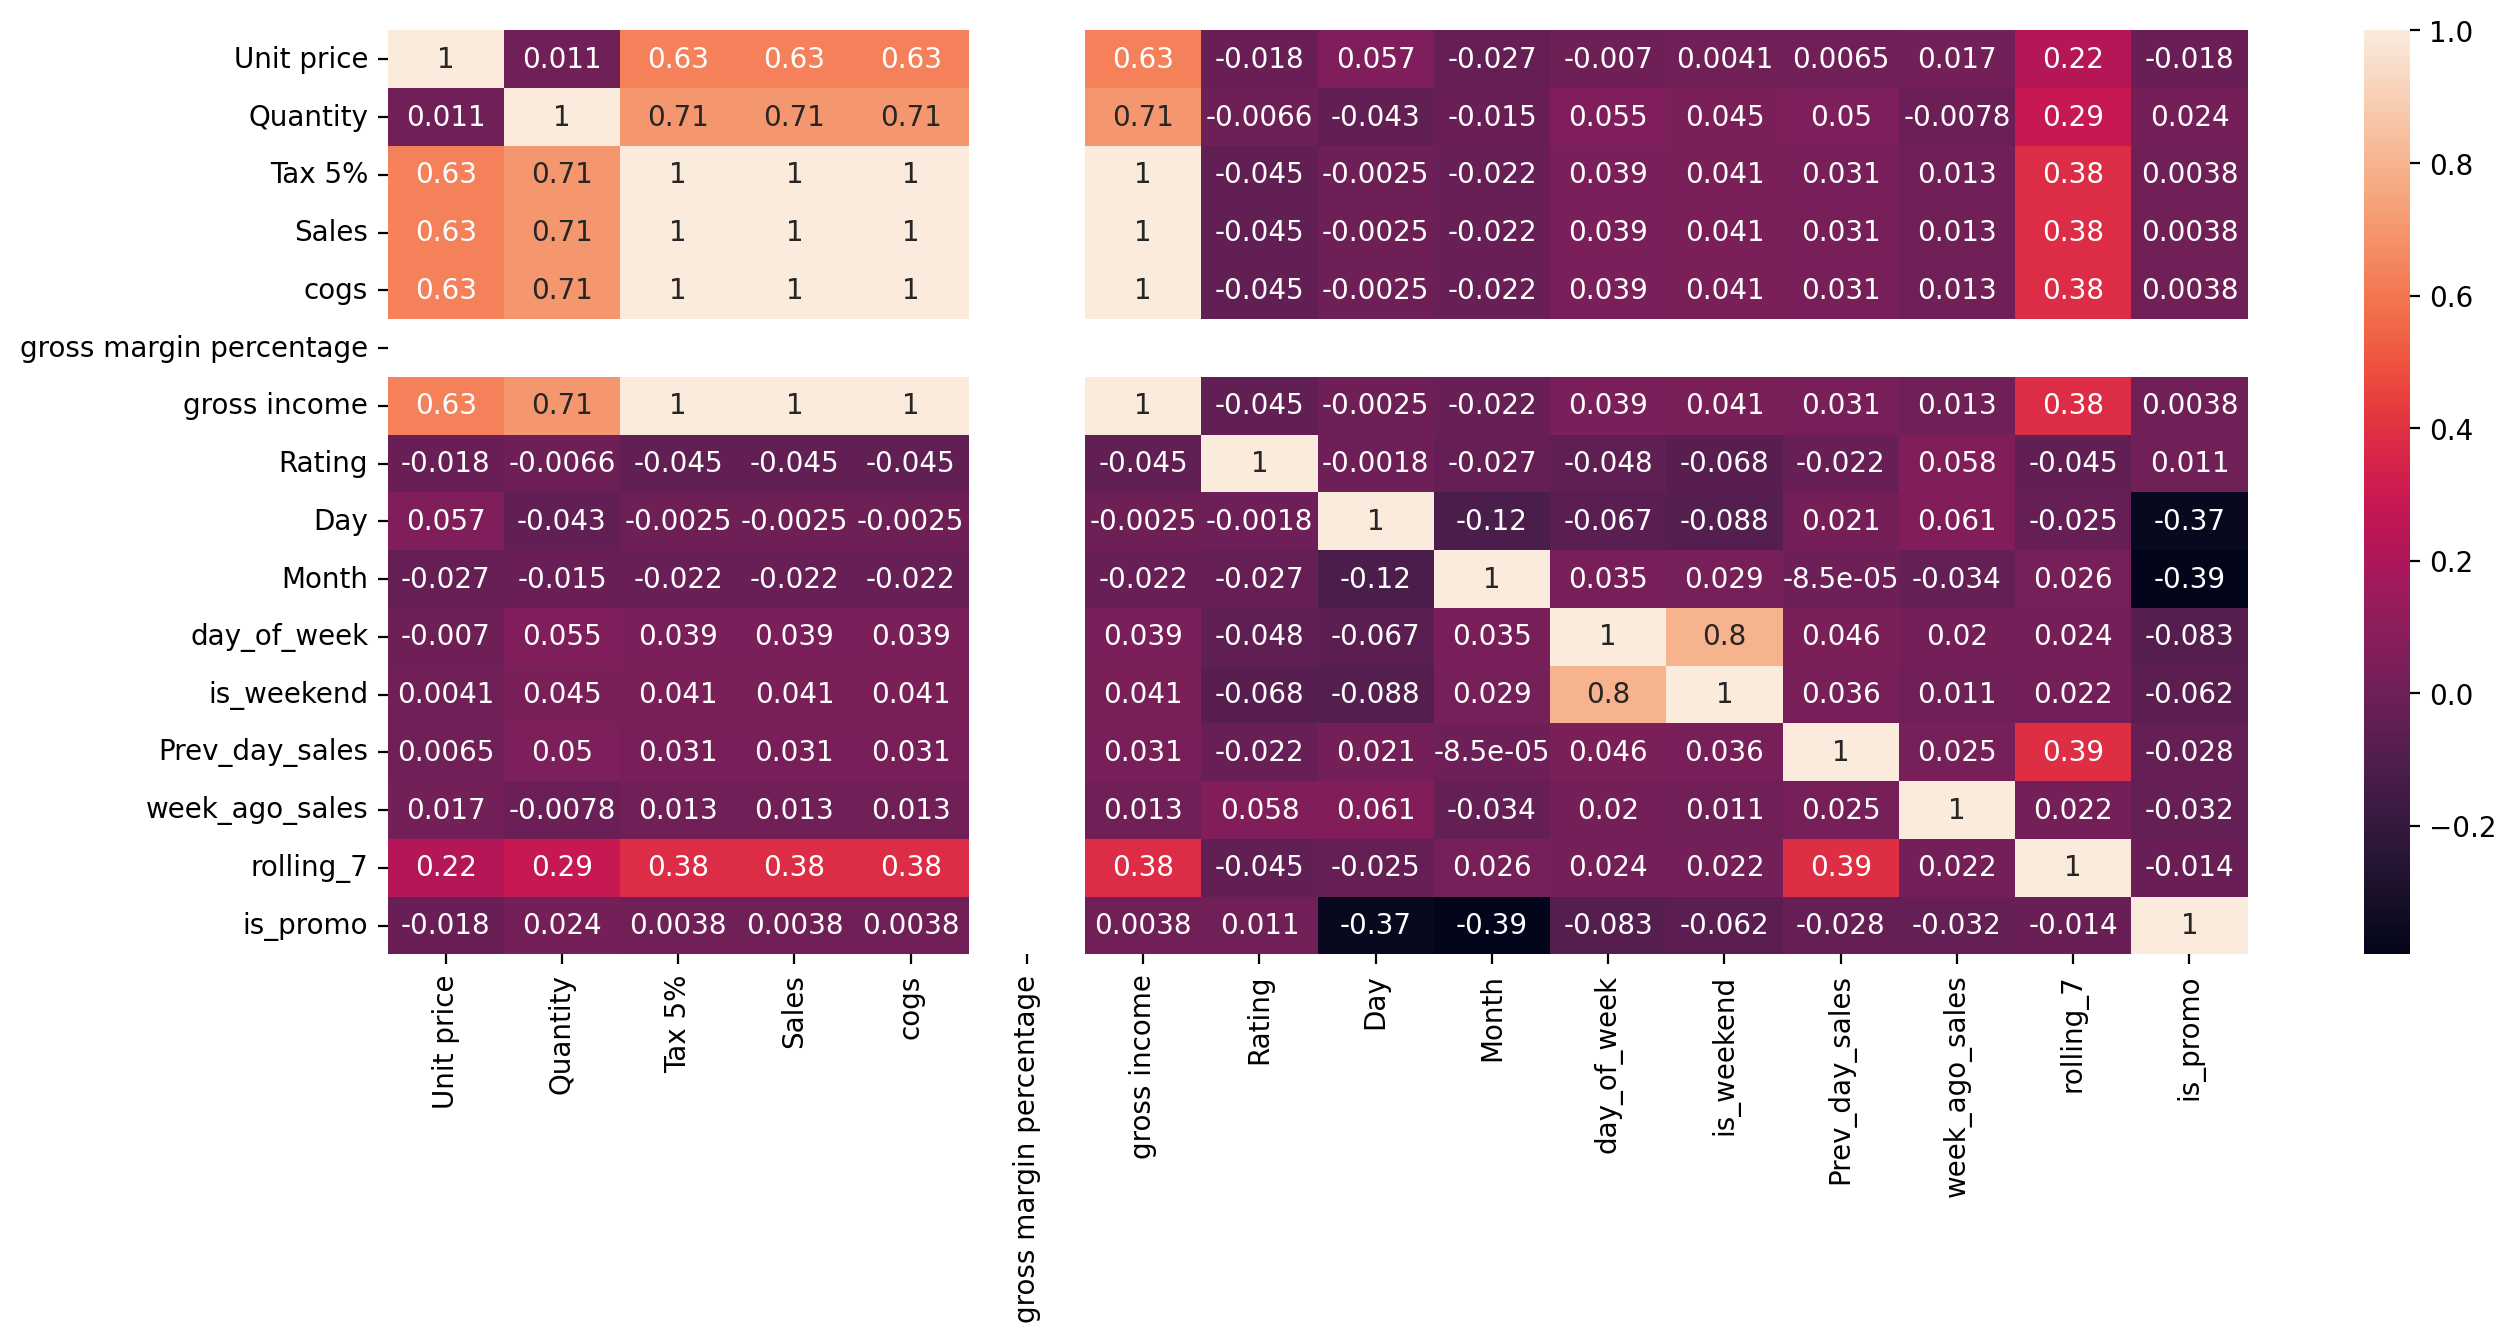

In [30]:
plt.figure(figsize=(15,6),dpi=200)
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

# Feature Engineering

In [31]:
df['Branch'].unique()

array(['Alex', 'Giza', 'Cairo'], dtype=object)

In [32]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [33]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [34]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [35]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [36]:
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder = LabelEncoder()

In [39]:
df['Branch'] = encoder.fit_transform(df['Branch'])
df['City'] = encoder.fit_transform(df['City'])
df['Customer type'] = encoder.fit_transform(df['Customer type'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Product line'] = encoder.fit_transform(df['Product line'])
df['Payment'] = encoder.fit_transform(df['Payment'])
df['Weekday'] = encoder.fit_transform(df['Weekday'])
df['weekday_name'] = encoder.fit_transform(df['weekday_name'])
df['is_weekend'] = encoder.fit_transform(df['is_weekend'])
df['is_promo'] = encoder.fit_transform(df['is_promo'])
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Payment,...,Day,Month,Weekday,day_of_week,weekday_name,is_weekend,Prev_day_sales,week_ago_sales,rolling_7,is_promo
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-05,0,2,0,0,3,74.69,7,26.1415,548.9715,2,...,5,1,2,5,2,1,NaN,NaN,NaN,1
2019-03-08,2,1,1,0,0,15.28,5,3.8200,80.2200,0,...,8,3,0,4,0,0,548.9715,NaN,NaN,0
2019-03-03,0,2,1,0,4,46.33,7,16.2155,340.5255,1,...,3,3,3,6,3,1,80.2200,NaN,NaN,0
2019-01-27,0,2,0,0,3,58.22,8,23.2880,489.0480,2,...,27,1,3,6,3,1,340.5255,NaN,NaN,0
2019-02-08,0,2,0,0,5,86.31,7,30.2085,634.3785,2,...,8,2,0,4,0,0,489.0480,NaN,NaN,0


# Train Test Split

### 🛠 Fixing NaN Misalignment in Training Set
We combine `X_train` and `y_train` to ensure index alignment before dropping NaNs.

In [41]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Combine to ensure aligned index before dropping NaNs
train_combined = pd.concat([X_train, y_train], axis=1).dropna()
X_train = train_combined.drop(y_train.name, axis=1)
y_train = train_combined[y_train.name]

# Reset index for safety in future modeling steps
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [45]:
X_train.shape

(793, 23)

In [46]:
X_test.shape

(200, 23)

In [47]:
y_train.shape

(793,)

In [48]:
y_test.shape

(200,)

## Validation

In [49]:
X_validation, X_holdout_test, y_validation, y_holdout_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [50]:
X_validation.shape

(100, 23)

In [51]:
X_holdout_test.shape

(100, 23)

In [52]:
y_validation.shape

(100,)

In [53]:
y_holdout_test.shape

(100,)

In [54]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy='mean')

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_valdation = pd.DataFrame(imputer.transform(X_validation), columns=X_validation.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Model Building

## 1.Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

In [56]:
lr_model = LinearRegression()

In [57]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = lr_model.predict(X_validation)

In [59]:
mae = mean_absolute_error(y_validation, y_pred)
rmse = np.sqrt(mean_squared_error(y_validation, y_pred))
r2 = r2_score(y_validation, y_pred)

results_linear = {"Linear Regression": {"MAE": mae, "RMSE": rmse, "R2": r2}}

In [60]:
df_lr_results = pd.DataFrame(results_linear).T.sort_values(by="RMSE")
df_lr_results

,MAE,RMSE,R2
Linear Regression,3.494449e-13,4.177496e-13,1.0


## 2.Random forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf_model = RandomForestRegressor()

In [63]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
y_pred = rf_model.predict(X_validation)

In [65]:
mae = mean_absolute_error(y_validation, y_pred)
rmse = np.sqrt(mean_squared_error(y_validation, y_pred))
r2 = r2_score(y_validation, y_pred)

results_rf = {"Random Forest": {"MAE": mae, "RMSE": rmse, "R2": r2}}

In [66]:
df_rf_results = pd.DataFrame(results_rf).T.sort_values(by="RMSE")
df_rf_results

,MAE,RMSE,R2
Random Forest,0.896259,1.584057,0.999961


## 3.Decision Tree

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
dt_model = DecisionTreeRegressor()

In [69]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [70]:
y_pred = dt_model.predict(X_validation)

In [71]:
mae = mean_absolute_error(y_validation, y_pred)
rmse = np.sqrt(mean_squared_error(y_validation, y_pred))
r2 = r2_score(y_validation, y_pred)

results_dt = {"Decision Tree": {"MAE": mae, "RMSE": rmse, "R2": r2}}

In [72]:
df_dt_results = pd.DataFrame(results_dt).T.sort_values(by="RMSE")
df_dt_results

,MAE,RMSE,R2
Decision Tree,1.64934,2.884428,0.999872


## 4.XG Boost

In [73]:
from xgboost import XGBRegressor

In [74]:
xgb_model = XGBRegressor(objective='reg:squarederror')

In [75]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [76]:
y_pred = xgb_model.predict(X_validation)

In [77]:
mae = mean_absolute_error(y_validation, y_pred)
rmse = np.sqrt(mean_squared_error(y_validation, y_pred))
r2 = r2_score(y_validation, y_pred)

results_xgb = {"XGBoost": {"MAE": mae, "RMSE": rmse, "R2": r2}}

In [78]:
df_xgb_results = pd.DataFrame(results_xgb).T.sort_values(by="RMSE")
df_xgb_results

,MAE,RMSE,R2
XGBoost,2.967241,5.112718,0.999599


# Model Comparison

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror')
}


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

results = []

In [81]:
for name, model in models.items():
    model.fit(X_train, y_train)                     
    y_pred = model.predict(X_validation)                  
    
    mae = mean_absolute_error(y_validation, y_pred)
    mse = mean_squared_error(y_validation, y_pred)
    r2 = r2_score(y_validation, y_pred)
    
    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "R² Score": round(r2, 4)
    })    

In [82]:
comparison_df = pd.DataFrame(results)
comparison_df

,Model,MAE,MSE,R² Score
0,Linear Regression,0.00,0.00,1.0000
1,Decision Tree,1.34,4.24,0.9999
2,Random Forest,0.88,2.55,1.0000
3,XGBoost,2.97,26.14,0.9996
